# <center>EPIB 613 INTRODUCTION TO STATISTICAL SOFTWARE</center>

<center> McGill EBOH </center>

<center> Fall 2020 </center>

<center> Yi Lian </center>

# Lecture 8
- Additional lecture on data manipulation

## 1. Revisit a motivating example from EPIB 607

In [1]:
library(covdata)
library(dplyr)
library(tidyr)
library(ggplot2)
library(readr)


Attaching package: ‘covdata’


The following object is masked from ‘package:datasets’:

    uspop



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### rename( ) and select( )

In [2]:
pop_county <- read_csv("https://opendata.arcgis.com/datasets/21843f238cbb46b08615fc53e19e0daf_1.csv") %>% 
    dplyr::rename(fips = GEOID, population = B01001_001E, state = State) %>%
    dplyr::select(state, fips, population)

Parsed with column specification:
cols(
  .default = col_double(),
  COUNTYNS = col_character(),
  GEOID = col_character(),
  NAME = col_character(),
  State = col_character(),
  created_user = col_character(),
  created_date = col_character(),
  last_edited_user = col_character(),
  last_edited_date = col_character()
)

See spec(...) for full column specifications.



In [3]:
pop_county

state,fips,population
<chr>,<chr>,<dbl>
Alabama,01001,55200
Alabama,01003,208107
Alabama,01005,25782
Alabama,01007,22527
Alabama,01009,57645
Alabama,01011,10352
Alabama,01013,20025
Alabama,01015,115098
Alabama,01017,33826


##### Breaks it down step by step to see what it does.

In [4]:
raw <- read_csv("https://opendata.arcgis.com/datasets/21843f238cbb46b08615fc53e19e0daf_1.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  COUNTYNS = col_character(),
  GEOID = col_character(),
  NAME = col_character(),
  State = col_character(),
  created_user = col_character(),
  created_date = col_character(),
  last_edited_user = col_character(),
  last_edited_date = col_character()
)

See spec(...) for full column specifications.



In [5]:
dim(raw)
raw.rename <- dplyr::rename(`.data` = raw, fips = GEOID, population = B01001_001E, state = State)
names(raw); names(raw.rename)

[1] 3220   23

[1] "FID"                     "COUNTYNS"               
 [3] "GEOID"                   "ALAND"                  
 [5] "AWATER"                  "NAME"                   
 [7] "State"                   "B25010_001E"            
 [9] "B25010_001M"             "B25010_002E"            
[11] "B25010_002M"             "B25010_003E"            
[13] "B25010_003M"             "B01001_001E"            
[15] "B01001_001M"             "B01001_calc_PopDensity" 
[17] "created_user"            "created_date"           
[19] "last_edited_user"        "last_edited_date"       
[21] "B01001_calc_PopDensityM" "SHAPE_Length"           
[23] "SHAPE_Area"

[1] "FID"                     "COUNTYNS"               
 [3] "fips"                    "ALAND"                  
 [5] "AWATER"                  "NAME"                   
 [7] "state"                   "B25010_001E"            
 [9] "B25010_001M"             "B25010_002E"            
[11] "B25010_002M"             "B25010_003E"            
[13] "B25010_003M"             "population"             
[15] "B01001_001M"             "B01001_calc_PopDensity" 
[17] "created_user"            "created_date"           
[19] "last_edited_user"        "last_edited_date"       
[21] "B01001_calc_PopDensityM" "SHAPE_Length"           
[23] "SHAPE_Area"

In [6]:
raw.rename.select <- dplyr::select(`.data` = raw.rename, state, fips, population)
raw.rename.select

state,fips,population
<chr>,<chr>,<dbl>
Alabama,01001,55200
Alabama,01003,208107
Alabama,01005,25782
Alabama,01007,22527
Alabama,01009,57645
Alabama,01011,10352
Alabama,01013,20025
Alabama,01015,115098
Alabama,01017,33826


### left_join( ), mutate( ), filter( ), group_by( )

In [7]:
county_level <- nytcovcounty %>%
    dplyr::left_join(pop_county, by = c("state","fips")) %>%
    dplyr::mutate(cases.per.10k = cases/population * 1e4) %>%
    dplyr::filter(state %in% c("Iowa","Illinois")) %>%
    dplyr::group_by(county)
county_level

date,county,state,fips,cases,deaths,population,cases.per.10k
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-24,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-25,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-26,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-27,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-28,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-29,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-30,Cook,Illinois,17031,2,0,5223719,0.003828690
2020-01-31,Cook,Illinois,17031,2,0,5223719,0.003828690
2020-02-01,Cook,Illinois,17031,2,0,5223719,0.003828690


In [8]:
nytcovcounty

date,county,state,fips,cases,deaths
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2020-01-21,Snohomish,Washington,53061,1,0
2020-01-22,Snohomish,Washington,53061,1,0
2020-01-23,Snohomish,Washington,53061,1,0
2020-01-24,Cook,Illinois,17031,1,0
2020-01-24,Snohomish,Washington,53061,1,0
2020-01-25,Orange,California,06059,1,0
2020-01-25,Cook,Illinois,17031,1,0
2020-01-25,Snohomish,Washington,53061,1,0
2020-01-26,Maricopa,Arizona,04013,1,0


In [9]:
# Again breaks it down
county.left_join <- dplyr::left_join(x = nytcovcounty,
                              y = pop_county,
                              by = c("state","fips"))
county.left_join

date,county,state,fips,cases,deaths,population
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2020-01-21,Snohomish,Washington,53061,1,0,786620
2020-01-22,Snohomish,Washington,53061,1,0,786620
2020-01-23,Snohomish,Washington,53061,1,0,786620
2020-01-24,Cook,Illinois,17031,1,0,5223719
2020-01-24,Snohomish,Washington,53061,1,0,786620
2020-01-25,Orange,California,06059,1,0,3164182
2020-01-25,Cook,Illinois,17031,1,0,5223719
2020-01-25,Snohomish,Washington,53061,1,0,786620
2020-01-26,Maricopa,Arizona,04013,1,0,4253913


In [10]:
county.left_join.mutate <- mutate(`.data` = county.left_join,
                                  cases.per.10k = cases/population * 1e4)
county.left_join.mutate

date,county,state,fips,cases,deaths,population,cases.per.10k
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-21,Snohomish,Washington,53061,1,0,786620,0.012712619
2020-01-22,Snohomish,Washington,53061,1,0,786620,0.012712619
2020-01-23,Snohomish,Washington,53061,1,0,786620,0.012712619
2020-01-24,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-24,Snohomish,Washington,53061,1,0,786620,0.012712619
2020-01-25,Orange,California,06059,1,0,3164182,0.003160374
2020-01-25,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-25,Snohomish,Washington,53061,1,0,786620,0.012712619
2020-01-26,Maricopa,Arizona,04013,1,0,4253913,0.002350777


In [11]:
county.left_join.mutate.filter <- dplyr::filter(`.data` = county.left_join.mutate,
                                                state %in% c("Iowa","Illinois"))
county.left_join.mutate.filter

date,county,state,fips,cases,deaths,population,cases.per.10k
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-24,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-25,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-26,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-27,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-28,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-29,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-30,Cook,Illinois,17031,2,0,5223719,0.003828690
2020-01-31,Cook,Illinois,17031,2,0,5223719,0.003828690
2020-02-01,Cook,Illinois,17031,2,0,5223719,0.003828690


In [12]:
# Base R subset function covered in previous lectures
# subset(x = county.left_join.mutate, subset = state %in% c("Iowa","Illinois"))

In [13]:
# %in%

1 %in% 1:3

[1] TRUE

In [14]:
c("a", "b", "c") %in% c("a", "d", "e")

[1]  TRUE FALSE FALSE

In [15]:
county.left_join.mutate.filter.group_by <- dplyr::group_by(`.data` = county.left_join.mutate.filter, county)
county.left_join.mutate.filter.group_by

date,county,state,fips,cases,deaths,population,cases.per.10k
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-24,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-25,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-26,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-27,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-28,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-29,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-30,Cook,Illinois,17031,2,0,5223719,0.003828690
2020-01-31,Cook,Illinois,17031,2,0,5223719,0.003828690
2020-02-01,Cook,Illinois,17031,2,0,5223719,0.003828690


In [16]:
pop_state <- pop_county %>%
    dplyr::group_by(state) %>%
    dplyr::summarise(population = sum(population, na.rm = TRUE))
pop_state

`summarise()` ungrouping output (override with `.groups` argument)



state,population
<chr>,<dbl>
Alabama,4864680
Alaska,738516
Arizona,6946685
Arkansas,2990671
California,39148760
Colorado,5531141
Connecticut,3581504
Delaware,949495
District of Columbia,684498


In [17]:
state_level <- county_level %>%
    dplyr::group_by(state, date) %>%
    dplyr::filter(date >= "2020-03-15") %>%
    dplyr::summarise(cases = sum(cases)) %>%
    dplyr::left_join(pop_state, by = "state") %>%
    dplyr::mutate(cases.per.10k = cases / population * 1e4, state = factor(state),
                  time = as.numeric(date - min(date)) + 1)
state_level

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,date,cases,population,cases.per.10k,time
<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
Illinois,2020-03-15,94,12821497,0.07331437,1
Illinois,2020-03-16,104,12821497,0.08111377,2
Illinois,2020-03-17,159,12821497,0.12401048,3
Illinois,2020-03-18,286,12821497,0.22306288,4
Illinois,2020-03-19,420,12821497,0.32757485,5
Illinois,2020-03-20,583,12821497,0.45470509,6
Illinois,2020-03-21,751,12821497,0.58573504,7
Illinois,2020-03-22,1047,12821497,0.81659731,8
Illinois,2020-03-23,1285,12821497,1.00222306,9


## 2. Revisit the exercise from last lecture

In [18]:
# order of factors in R
# Check
sort(factor(c("A", "b", "a", "ab", "a1", "c", "1", "1a", "!!!")))

[1] !!! 1   1a  a   A   a1  ab  b   c  
Levels: !!! 1 1a a A a1 ab b c

In [19]:
set.seed(613)
students <- rep(c("Lucy", "John", "Mark", "Candy", "Chris"), 3)
course <- rep(c("epib601", "epib607", "epib613"), each = 5)
scores <- sample(50:100, size = 15, replace = T)
program <- rep(c("EPIB", "EPIB", "EPIB", "PH", "PH"))

df <- data.frame(students, course, scores, program)
df <- df[sample(1:nrow(df)), ]   # shuffle the rows to make things more complicated
df

,students,course,scores,program
,<fct>,<fct>,<int>,<fct>
6,Lucy,epib607,82,EPIB
15,Chris,epib613,53,PH
7,John,epib607,98,EPIB
9,Candy,epib607,80,PH
4,Candy,epib601,68,PH
1,Lucy,epib601,57,EPIB
3,Mark,epib601,59,EPIB
14,Candy,epib613,61,PH
10,Chris,epib607,56,PH


##### A useful trick to write our own functions: complete all the steps and put them into a function

In [20]:
# the arguments will be
    # data = df
    # pivot = "students"
    # names_from = "course"
    # values_from = "scores"
# Use the actually R objects and values to test
# Finally put them into the function, substitute the actural values by argument names

In [21]:
# reorder data - to take advantage of the ordering of factors
df <- df[order(df[, "students"]), ]; df
df <- df[order(df[, "course"]), ]; df

,students,course,scores,program
,<fct>,<fct>,<int>,<fct>
9,Candy,epib607,80,PH
4,Candy,epib601,68,PH
14,Candy,epib613,61,PH
15,Chris,epib613,53,PH
10,Chris,epib607,56,PH
5,Chris,epib601,64,PH
7,John,epib607,98,EPIB
12,John,epib613,59,EPIB
2,John,epib601,78,EPIB


,students,course,scores,program
,<fct>,<fct>,<int>,<fct>
4,Candy,epib601,68,PH
5,Chris,epib601,64,PH
2,John,epib601,78,EPIB
1,Lucy,epib601,57,EPIB
3,Mark,epib601,59,EPIB
9,Candy,epib607,80,PH
10,Chris,epib607,56,PH
7,John,epib607,98,EPIB
6,Lucy,epib607,82,EPIB


In [22]:
# get column names
col.names <- unique(df[, "course"])
col.names

[1] epib601 epib607 epib613
Levels: epib601 epib607 epib613

In [23]:
# get number of columns - one for each course
n.col <- length(col.names)
n.col

[1] 3

In [24]:
# generate pivot variable
pivot.var <- unique(df[, "students"])
pivot.var

[1] Candy Chris John  Lucy  Mark 
Levels: Candy Chris John Lucy Mark

In [25]:
# generate number of pivots
n.pivot <- length(pivot.var)
n.pivot

[1] 5

In [26]:
# generate value matrix
value.mat <- matrix(df[, "scores"], nrow = n.pivot, ncol = n.col, byrow = F)
value.mat

68,80,61
64,56,53
78,98,59
57,82,75
59,57,80


In [27]:
# assemble wide data frame
data_wide <- data.frame(pivot.var, value.mat)
data_wide

pivot.var,X1,X2,X3
<fct>,<int>,<int>,<int>
Candy,68,80,61
Chris,64,56,53
John,78,98,59
Lucy,57,82,75
Mark,59,57,80


In [28]:
# rename wide data frame
names(data_wide) <- c("student", as.character(col.names))
data_wide

student,epib601,epib607,epib613
<fct>,<int>,<int>,<int>
Candy,68,80,61
Chris,64,56,53
John,78,98,59
Lucy,57,82,75
Mark,59,57,80


In [29]:
## A sample solution

# Put the steps together into the function
    # change df (the actual data frame) to data (argument name)
    # change "students" to pivot
    # change "course" to names_from
    # change "scores" to values_from
# so that the function can be applied to other similar data frames.

my_wider <- function(data, pivot, names_from, values_from) {
  
  # reorder data - to take advantage of the ordering of factors
  data <- data[order(data[, pivot]), ]
  data <- data[order(data[, names_from]), ]
  
  # get column names
  col.names <- unique(data[, names_from])

  # get number of columns - one for each course
  n.col <- length(col.names)
  
  # generate pivot variable
  pivot.var <- unique(data[, pivot])
  
  # generate number of pivots
  n.pivot <- length(pivot.var)
  
  # generate value matrix
  value.mat <- matrix(data[, values_from], nrow = n.pivot, ncol = n.col, byrow = F)
  
  # assemble wide data frame
  data_wide <- data.frame(pivot.var, value.mat)
  
  # rename wide data frame
  names(data_wide) <- c(pivot, as.character(col.names))
  
  return(data_wide)
}

df_wide <- my_wider(df, pivot = "students", names_from = "course", values_from = "scores")
df_wide

students,epib601,epib607,epib613
<fct>,<int>,<int>,<int>
Candy,68,80,61
Chris,64,56,53
John,78,98,59
Lucy,57,82,75
Mark,59,57,80


In [30]:
my_longer <- function(data, pivot, cols, names_to, values_to) {
  
  # extract the values
  values <- data[, cols]
  
  # change it to a vector, by column
  values <- as.vector(as.matrix(values))
  
  # determine number of cols
  n.col <- length(cols)
  
  # rep the pivot variable
  pivot.var <- rep(unlist(data[, pivot]), n.col)
  
  # determine the number of pivots
  n.pivot <- nrow(data)
  
  # make the names_to variable
  names_to.var <- rep(cols, each = n.pivot)
  
  # assemble long data frame
  data.long <- data.frame(pivot.var, names_to.var, values)
  
  # rename long data frame
  names(data.long) <- c(pivot, names_to, values_to)
  
  return(data.long)
  
}

my_longer(df_wide,
          pivot = "students",
          cols = c("epib601", "epib607", "epib613"),
          names_to = "course",
          values_to = "scores")

students,course,scores
<fct>,<fct>,<int>
Candy,epib601,68
Chris,epib601,64
John,epib601,78
Lucy,epib601,57
Mark,epib601,59
Candy,epib607,80
Chris,epib607,56
John,epib607,98
Lucy,epib607,82


## 3. aggregate( )
- Performs some operation by group
- Like dplyr::group_by( ) %>% some operation

### 3.1 Calculate class average for the three courses

In [31]:
aggregate(scores ~ course, FUN = mean, data = df)

course,scores
<fct>,<dbl>
epib601,65.2
epib607,74.6
epib613,65.6


In [32]:
# df %>%
#     dplyr::group_by() %>%
#     dplyr::summarise()
df %>%
    group_by(course) %>%
    summarise(scores=mean(scores))

`summarise()` ungrouping output (override with `.groups` argument)



course,scores
<fct>,<dbl>
epib601,65.2
epib607,74.6
epib613,65.6


### 3.2 Calculate class average for the three courses by program

In [33]:
df[1,3] <- NA; df

,students,course,scores,program
,<fct>,<fct>,<int>,<fct>
4,Candy,epib601,NA,PH
5,Chris,epib601,64,PH
2,John,epib601,78,EPIB
1,Lucy,epib601,57,EPIB
3,Mark,epib601,59,EPIB
9,Candy,epib607,80,PH
10,Chris,epib607,56,PH
7,John,epib607,98,EPIB
6,Lucy,epib607,82,EPIB


In [34]:
df %>%
    group_by(course, program) %>%
    summarise(scores=mean(scores))

`summarise()` regrouping output by 'course' (override with `.groups` argument)



course,program,scores
<fct>,<fct>,<dbl>
epib601,EPIB,64.66667
epib601,PH,NA
epib607,EPIB,79.00000
epib607,PH,68.00000
epib613,EPIB,71.33333
epib613,PH,57.00000


In [35]:
df %>%
    group_by(course, program) %>%
    summarise(scores=mean(scores, na.rm = T))

`summarise()` regrouping output by 'course' (override with `.groups` argument)



course,program,scores
<fct>,<fct>,<dbl>
epib601,EPIB,64.66667
epib601,PH,64.00000
epib607,EPIB,79.00000
epib607,PH,68.00000
epib613,EPIB,71.33333
epib613,PH,57.00000


### 3.3 Calculate a rounded class average
##### Very important! Very powerful! Write your own function to work with aggregate( ).

In [36]:
mean.rounded <- function(x) {
    round(mean(x))
}

aggregate(scores ~ course + program, FUN = mean.rounded, data = df)

course,program,scores
<fct>,<fct>,<dbl>
epib601,EPIB,65
epib607,EPIB,79
epib613,EPIB,71
epib601,PH,64
epib607,PH,68
epib613,PH,57


In [37]:
df %>%
    group_by(course, program) %>%
    summarise(scores = round(mean(scores)))

`summarise()` regrouping output by 'course' (override with `.groups` argument)



course,program,scores
<fct>,<fct>,<dbl>
epib601,EPIB,65
epib601,PH,NA
epib607,EPIB,79
epib607,PH,68
epib613,EPIB,71
epib613,PH,57


### 3.4 See how does aggregate( ) do its job

In [38]:
df

,students,course,scores,program
,<fct>,<fct>,<int>,<fct>
4,Candy,epib601,NA,PH
5,Chris,epib601,64,PH
2,John,epib601,78,EPIB
1,Lucy,epib601,57,EPIB
3,Mark,epib601,59,EPIB
9,Candy,epib607,80,PH
10,Chris,epib607,56,PH
7,John,epib607,98,EPIB
6,Lucy,epib607,82,EPIB


In [39]:
aggregate(scores ~ course, FUN = print, data = df)

[1] 64 78 57 59
[1] 80 56 98 82 57
[1] 61 53 59 75 80


course,scores
<fct>,<list>
epib601,"64, 78, 57, 59"
epib607,"80, 56, 98, 82, 57"
epib613,"61, 53, 59, 75, 80"


### 3.5 Exercise: plot the covid cases trend for each county in Illinois

In [40]:
county_level

date,county,state,fips,cases,deaths,population,cases.per.10k
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-24,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-25,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-26,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-27,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-28,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-29,Cook,Illinois,17031,1,0,5223719,0.001914345
2020-01-30,Cook,Illinois,17031,2,0,5223719,0.003828690
2020-01-31,Cook,Illinois,17031,2,0,5223719,0.003828690
2020-02-01,Cook,Illinois,17031,2,0,5223719,0.003828690


In [41]:
illinois <- county_level[county_level$state == "Illinois", ]

In [42]:
# aggregate(cases~county, FUN = plot, type = "l", data = illinois)

In [43]:
as.factor(unique(illinois$county))

[1] Cook        Kane        McHenry     Lake        Cumberland  DuPage     
  [7] Sangamon    St. Clair   Woodford    Clinton     Whiteside   Winnebago  
 [13] Peoria      Will        Jackson     Kankakee    Kendall     LaSalle    
 [19] Madison     Washington  Williamson  Adams       Christian   McLean     
 [25] DeKalb      Champaign   Jo Daviess  Livingston  Rock Island Stephenson 
 [31] Monroe      Unknown     Grundy      Douglas     Marshall    Morgan     
 [37] Franklin    Tazewell    Bureau      Henry       Iroquois    Carroll    
 [43] Fayette     Macon       Bond        Knox        Menard      Montgomery 
 [49] Clark       Crawford    Marion      Randolph    Saline      Ford       
 [55] Ogle        Massac      Vermilion   Logan       Macoupin    Mercer     
 [61] Moultrie    Piatt       De Witt     Effingham   Jersey      Jasper     
 [67] Lee         Mason       Pike        Boone       Calhoun     Gallatin   
 [73] Jefferson   Wabash      Coles       Lawrence    Richland    Shelby     
 [79] Hancock     Stark       Pulaski     Schuyler    Fulton      Greene     
 [85] McDonough   Perry       Warren      Johnson     Clay        Union      
 [91] Alexander   Henderson   Wayne       Hamilton    Cass        White      
 [97] Hardin      Brown       Pope        Edwards     Putnam      Edgar      
[103] Scott      
103 Levels: Adams Alexander Bond Boone Brown Bureau Calhoun Carroll ... Woodford

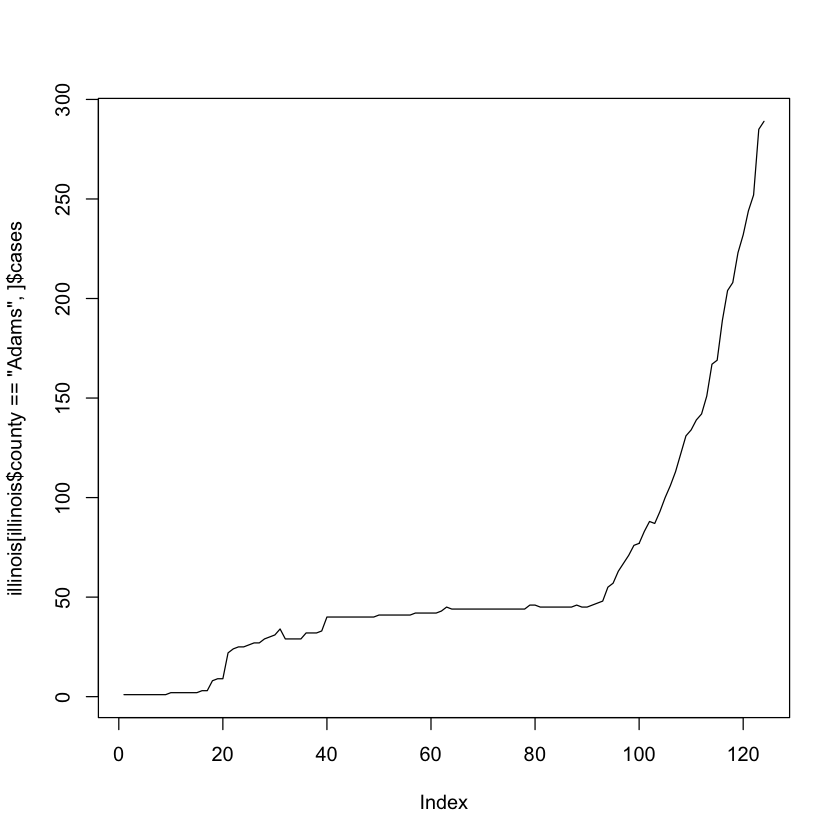

In [44]:
# verify that we got the correct plots
plot(illinois[illinois$county == "Adams", ]$cases, type = "l")

### Exercise. Change the Illinois case data from the long format (one row per county per day) to the wide format (one row per county with a column for each day)
- Use dplyr::pivot_wider( )
- Use my_wider( )